# **Title:**
#        **ITSM Improvement through Machine Learning: Enhancing Incident Management at ABC Tech.**

# **PROBLEM** **OF** **STATEMENT:**

*   Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

*   Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

*    Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

*    Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.









# **Description:**
## **Business Case Description:**

ABC Tech is an established mid-sized organization operating in the IT-enabled business sector for over a decade. They manage a significant volume of IT incidents and tickets, averaging between 22,000 to 25,000 per year. ABC Tech follows best practices in IT Service Management (ITSM), including incident management, problem management, change management, and configuration management processes. These ITIL practices have matured over time, reaching a high level of process maturity.

Recently, ABC Tech conducted an audit that indicated that further improvement initiatives in their ITSM processes may not provide a sufficient return on investment (ROI). Despite their mature processes, customer feedback from recent surveys has revealed that incident management, in particular, is rated poorly, suggesting there is room for enhancement.

In response to these challenges, ABC Tech's management has decided to explore the potential of machine learning (ML) to enhance their ITSM processes. After attending a Machine Learning conference focused on IT Service Management (ITSM), they identified four key areas where ML can contribute to improving ITSM processes within the organization:

1. **Predicting High Priority Tickets:** ABC Tech aims to develop an ML model that can predict high-priority tickets, specifically those categorized as priority 1 and 2. This prediction will allow them to take proactive measures to address issues or incidents before they escalate.

2. **Forecasting Incident Volume:** The organization plans to use ML to forecast the incident volume in different fields on a quarterly and annual basis. This predictive capability will help them better allocate resources and plan for the required technology upgrades.

3. **Auto-Tagging Tickets:** ABC Tech intends to implement a text classification ML model to automatically assign correct priorities and departments to incoming tickets. This automation will reduce reassignment and related delays in ticket handling.

4. **Predicting RFC and ITSM Asset Misconfigurations:** The organization aims to create predictive models for Request for Change (RFC) and detect potential failures or misconfigurations in ITSM assets. Identifying these issues in advance will help in preventing disruptions and improving overall ITSM asset management.

The dataset that ABC Tech plans to use for these ML initiatives comprises a total of approximately 46,000 records spanning the years 2012, 2013, and 2014. The data is stored in a MySQL database with read-only access, and the relevant connection details are provided.

Here's a summary of some key fields in the dataset:

- CI_Name: Configuration Item Name
- CI_Cat: Configuration Item Category
- CI_Subcat: Configuration Item Subcategory
- Incident_ID: Incident Identifier
- Status: Incident Status (e.g., Closed)
- Impact: Impact level
- Urgency: Urgency level
- Priority: Incident Priority
- Category: Incident Category
- KB_number: Knowledge Base Number
- Alert_Status: Alert Status
- No_of_Reassignments: Number of Reassignments
- Open_Time: Incident Open Time
- Reopen_Time: Incident Reopen Time
- Resolved_Time: Incident Resolved Time
- Close_Time: Incident Close Time
- Handle_Time_hrs: Time taken to handle the incident (in hours)
- Closure_Code: Code for incident closure
- No_of_Related_Interactions: Number of Related Interactions
- Related_Interaction: Identifier for Related Interaction
- No_of_Related_Incidents: Number of Related Incidents
- No_of_Related_Changes: Number of Related Changes
- Related_Change: Identifier for Related Change


## **Import Basic Libraries:**

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## **Load Data:**

In [56]:
data=pd.read_csv("/content/ITSM_data.csv")

In [57]:
#data=pd.set_option("display.max_columns",None)
#data=pd.set_option("display.expand_frame_repr",False)

In [58]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [59]:
data.sample(20)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
31436,LAP000011,computer,Laptop,WBS000091,IM0031725,Closed,5,5,5.0,0.294741,...,NaN,28-01-2014 16:58,28-01-2014 16:58,"0,02",Hardware,1.0,SD0096124,NaN,NaN,NaN
26777,WBA000141,application,Web Based Application,WBS000068,IM0027048,Closed,4,4,4.0,0.425201,...,NaN,20-01-2014 09:53,20-01-2014 09:53,"6,96,08,33,333",No error - works as designed,1.0,SD0081225,NaN,NaN,NaN
38113,DTA000056,application,Desktop Application,WBS000091,IM0038431,Closed,3,3,3.0,0.652499,...,NaN,20-02-2014 11:41,20-02-2014 11:41,"0,117777778",Software,1.0,SD0116992,NaN,1.0,C00014762
42600,SBA000759,application,Server Based Application,WBS000296,IM0042967,Closed,4,4,4.0,0.387019,...,NaN,13-03-2014 14:44,13-03-2014 14:44,"1,44,62,22,222",Inquiry,1.0,SD0132152,NaN,NaN,NaN
9034,WBA000133,application,Web Based Application,WBS000073,IM0009199,Closed,4,4,4.0,0.846018,...,NaN,7/11/2013 10:46,7/11/2013 10:46,"6,82,51,94,444",Other,1.0,SD0024728,NaN,NaN,NaN
39128,LAP000009,computer,Laptop,WBS000091,IM0039455,Closed,5,5,5.0,0.499765,...,26-02-2014 17:20,12/3/2014 17:02,12/3/2014 17:02,"118,53",Hardware,4.0,#MULTIVALUE,NaN,NaN,NaN
26505,DTA000025,application,Desktop Application,WBS000110,IM0026774,Closed,4,4,4.0,0.573547,...,NaN,10/1/2014 13:30,10/1/2014 13:30,"1,46,36,94,444",Other,1.0,SD0080140,NaN,NaN,NaN
37807,WBA000144,application,Web Based Application,WBS000318,IM0038124,Closed,5,5,5.0,0.498607,...,NaN,26-02-2014 15:39,26-02-2014 15:39,"1,64,22,22,222",Other,1.0,SD0116402,1.0,NaN,NaN
28002,SBA000607,application,Server Based Application,WBS000263,IM0028275,Closed,5,5,5.0,0.024433,...,NaN,17-01-2014 10:23,17-01-2014 10:23,"2,12,23,05,556",Other,1.0,SD0085104,NaN,NaN,NaN
33636,CBD000248,computer,Banking Device,WBS000146,IM0033936,Closed,4,4,4.0,0.023187,...,NaN,11/2/2014 15:48,11/2/2014 15:49,"2,27,86,11,111",Unknown,1.0,SD0102846,NaN,NaN,NaN


In [60]:
data.drop(["CI_Name", "WBS", "Incident_ID", "KB_number", "Related_Interaction","Related_Change"], axis=1, inplace=True)

In [61]:
data.shape


(46606, 19)

# **Domain Analysis:**
Certainly! Domain analysis is an essential step in any data science or machine learning project. It involves gaining a deep understanding of the domain-specific aspects of the problem you're trying to solve. In this case, we're analyzing the domain of IT Service Management (ITSM) within the context of ABC Tech's business case. Here's a domain analysis for ITSM:

**1. IT Service Management (ITSM):**
   - **Definition:** IT Service Management (ITSM) refers to a set of practices and processes used by organizations to design, deliver, manage, and improve IT services for their customers and end-users.
   - **Importance:** ITSM ensures that IT services are aligned with business goals, reliable, and efficiently delivered, leading to enhanced customer satisfaction and business performance.

**2. Incident Management:**
   - **Definition:** Incident Management is a core ITSM process that involves identifying, categorizing, prioritizing, and resolving incidents to restore normal service operations as quickly as possible.
   - **Challenges:** Common challenges in incident management include handling a high volume of incidents, determining incident priorities, minimizing response times, and reducing the impact on end-users.

**3. Priority in ITSM:**
   - **Definition:** Priority is a classification system used to categorize incidents based on their severity and impact on business operations. In ITIL (IT Infrastructure Library) framework, there are typically four priority levels: Priority 1 (Critical), Priority 2 (High), Priority 3 (Medium), and Priority 4 (Low).
   - **Importance:** Prioritizing incidents helps organizations allocate resources effectively and respond to critical issues promptly.

**4. ITIL Framework:**
   - **Definition:** ITIL is a widely adopted framework for ITSM that provides best practices and guidelines for managing IT services, including incident management, problem management, change management, and configuration management.
   - **Maturity Levels:** ITIL processes can mature over time, starting from ad-hoc practices and progressing to well-defined, controlled, and optimized processes. A mature ITIL framework leads to improved service quality and efficiency.

**5. Machine Learning in ITSM:**
   - **Application:** Machine learning can be applied to ITSM processes to predict incidents, automate ticket classification, forecast resource needs, and detect anomalies or misconfigurations in IT assets.
   - **Benefits:** ML can enhance incident response, reduce manual workload, improve service quality, and proactively identify issues before they impact operations.

**6. Data Considerations:**
   - **Data Sources:** Data for ITSM projects typically come from various sources, including incident tracking systems, service logs, configuration databases, and customer feedback.
   - **Data Quality:** Data quality is critical, as inaccurate or incomplete data can lead to incorrect predictions and decisions.
   - **Privacy and Compliance:** ITSM data often contains sensitive information, so privacy and compliance with data protection regulations (e.g., GDPR) are crucial considerations.

**7. Metrics and KPIs:**
   - **Key Metrics:** Key Performance Indicators (KPIs) in ITSM include Mean Time to Resolve (MTTR), Incident Response Time, Incident Closure Rate, and Customer Satisfaction.
   - **Monitoring:** Continuous monitoring of KPIs helps organizations assess the effectiveness of their ITSM processes and make improvements.

**8. Stakeholders:**
   - **Internal Stakeholders:** IT teams, IT managers, incident responders, change management teams.
   - **External Stakeholders:** End-users, customers, auditors (for compliance).

**9. Challenges:**
   - **Scalability:** Handling a large volume of incidents efficiently can be challenging.
   - **Data Integration:** Integrating data from disparate sources can be complex.
   - **Change Management:** Implementing ML solutions may require organizational and cultural changes.


## **Basic Checks:**

In [62]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,Closed,4,4,4.0,0.601292,incident,closed,26.0,5/2/2012 13:32,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,2.0,NaN
1,application,Web Based Application,Closed,3,3,3.0,0.415050,incident,closed,33.0,12/3/2012 15:44,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,1.0,NaN
2,application,Desktop Application,Closed,NS,3,NaN,0.517551,request for information,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,NaN,NaN
3,application,Web Based Application,Closed,4,4,4.0,0.642927,incident,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,NaN,NaN
4,application,Web Based Application,Closed,4,4,4.0,0.345258,incident,closed,2.0,10/8/2012 11:01,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,NaN,NaN


In [63]:
data.tail()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
46601,application,Server Based Application,Closed,4,4,4.0,0.231896,incident,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,NaN,NaN
46602,application,Server Based Application,Closed,4,4,4.0,0.805153,incident,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,NaN,NaN
46603,computer,Laptop,Closed,5,5,5.0,0.917466,incident,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,NaN,NaN
46604,application,Web Based Application,Closed,4,4,4.0,0.701278,incident,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,NaN,NaN
46605,hardware,DataCenterEquipment,Closed,3,3,3.0,0.902320,incident,closed,0.0,31-03-2014 17:24,NaN,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1.0,NaN,NaN


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46495 non-null  object 
 1   CI_Subcat                   46495 non-null  object 
 2   Status                      46606 non-null  object 
 3   Impact                      46606 non-null  object 
 4   Urgency                     46606 non-null  object 
 5   Priority                    45226 non-null  float64
 6   number_cnt                  46606 non-null  float64
 7   Category                    46606 non-null  object 
 8   Alert_Status                46606 non-null  object 
 9   No_of_Reassignments         46605 non-null  float64
 10  Open_Time                   46606 non-null  object 
 11  Reopen_Time                 2284 non-null   object 
 12  Resolved_Time               44826 non-null  object 
 13  Close_Time                  466

In [65]:
data.dtypes

CI_Cat                         object
CI_Subcat                      object
Status                         object
Impact                         object
Urgency                        object
Priority                      float64
number_cnt                    float64
Category                       object
Alert_Status                   object
No_of_Reassignments           float64
Open_Time                      object
Reopen_Time                    object
Resolved_Time                  object
Close_Time                     object
Handle_Time_hrs                object
Closure_Code                   object
No_of_Related_Interactions    float64
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
dtype: object

In [66]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'Alert_Status', 'No_of_Reassignments',
       'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code', 'No_of_Related_Interactions',
       'No_of_Related_Incidents', 'No_of_Related_Changes'],
      dtype='object')

In [67]:
cat_data=data.select_dtypes(include=["O"]).columns
cat_data

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Category',
       'Alert_Status', 'Open_Time', 'Reopen_Time', 'Resolved_Time',
       'Close_Time', 'Handle_Time_hrs', 'Closure_Code'],
      dtype='object')

In [68]:
for i in cat_data:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print("----------------------------")

CI_Cat ['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64
----------------------------
CI_Subcat ['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Scanner' 

In [69]:
num_data=data.select_dtypes(include=["float64","int64"]).columns
num_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [70]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Priority,45226.0,4.215805,0.705624,1.000000,4.000000,4.000000,5.000000,5.000000
number_cnt,46606.0,0.499658,0.288634,0.000023,0.248213,0.500269,0.749094,0.999997
No_of_Reassignments,46605.0,1.131831,2.269774,0.000000,0.000000,0.000000,2.000000,46.000000
No_of_Related_Interactions,46492.0,1.149897,2.556338,1.000000,1.000000,1.000000,1.000000,370.000000
No_of_Related_Incidents,1222.0,1.669394,3.339687,1.000000,1.000000,1.000000,1.000000,63.000000
No_of_Related_Changes,560.0,1.058929,0.403596,1.000000,1.000000,1.000000,1.000000,9.000000


In [71]:
data.describe(include="object")

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Category,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code
count,46495,46495,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146
unique,12,64,2,6,11,4,1,34636,2244,33627,34528,30638,14
top,application,Server Based Application,Closed,4,4,incident,closed,24-03-2014 08:54,29-10-2013 15:03,10/10/2013 12:53,2/10/2013 15:20,0,Other
freq,32900,18811,46597,22556,15526,37748,46606,7,2,7,21,236,16470


##Unique value will be 1 for constant column.Here, Alert_Status is the constant feature. so we drop the column.

In [72]:
data.sample()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
12575,computer,Laptop,Closed,5,5,5.0,0.015107,incident,closed,0.0,12/11/2013 9:30,NaN,13-11-2013 15:42,13-11-2013 15:42,"1,66,91,94,444",Hardware,1.0,NaN,NaN


In [73]:
data.drop(["Alert_Status"],axis=1,inplace=True)

##**Basic Checks Report:**
###**Overview:**
When working with IT Service Management (ITSM) data or any dataset, it's essential to perform basic data checks to ensure the quality and integrity of the data. These basic checks help identify issues early on and ensure that your analysis or project is based on reliable data.

**Data Shape**: We Check the dimensions of the dataset, i.e., the number of rows and columns, using data.shape. Data Contains 46606 Rows and 25 columns.
**Data Types:** We Verified that the data types of each column are as expected usingdata.dtypes.Priority,number_cnt,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,No_of_Reassignments are in float64 and remaining columns are in object.

**Descriptive Statistics:** We Used data.describe().T to get summary statistics (mean, min, max, etc.) for numerical columns.
Use data.describe(include='O').T for a summary of categorical columns.

**Unique Values:** Checked the number of unique values in categorical columns using data['column'].unique(). here, One constant columns are there. so we dropped that column.

**Value Counts:** Examined the distribution of categorical values using df['column'].value_counts().

The goal is to ensure that our data is clean, complete, and suitable for analysis or further processing.

#**Data Preprocessing**


In [74]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'No_of_Reassignments', 'Open_Time',
       'Reopen_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [75]:
data.dtypes

CI_Cat                         object
CI_Subcat                      object
Status                         object
Impact                         object
Urgency                        object
Priority                      float64
number_cnt                    float64
Category                       object
No_of_Reassignments           float64
Open_Time                      object
Reopen_Time                    object
Resolved_Time                  object
Close_Time                     object
Handle_Time_hrs                object
Closure_Code                   object
No_of_Related_Interactions    float64
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
dtype: object

In [76]:
data.duplicated().sum()

0

In [77]:
data.isnull().sum()

CI_Cat                          111
CI_Subcat                       111
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

## **Replacing Null Values**

### **Replacing Null Values for CI_Cat**

In [78]:
data[data["CI_Cat"].isnull()]["CI_Cat"]

316      NaN
538      NaN
593      NaN
670      NaN
1128     NaN
        ... 
34462    NaN
34868    NaN
36150    NaN
38262    NaN
38429    NaN
Name: CI_Cat, Length: 111, dtype: object

<Axes: xlabel='CI_Cat', ylabel='Count'>

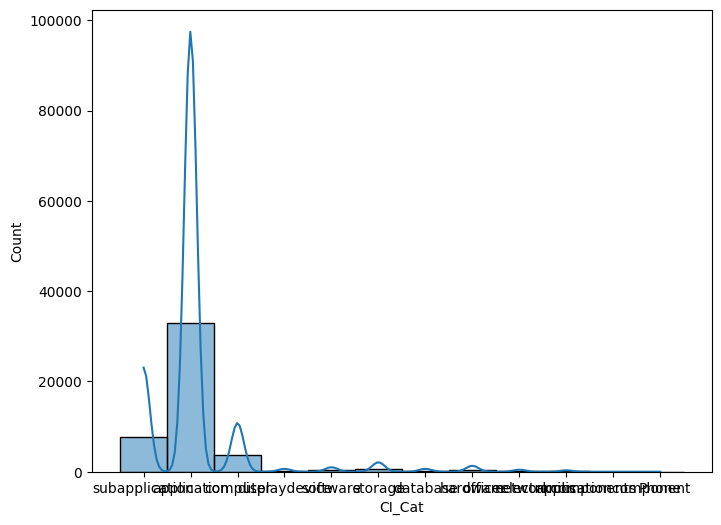

In [79]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['CI_Cat'], kde=True)

* The majority of the data is between 0 and 600.
* There are a few outliers at the high end.
* The median is slightly higher than the mode, which suggests that the data is somewhat skewed to the right.

In [80]:
data["CI_Cat"].mode()

0    application
Name: CI_Cat, dtype: object

In [81]:
data.CI_Cat.unique()
data.CI_Cat.value_counts()

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

In [82]:
data.loc[data["CI_Cat"].isnull()==True,"CI_Cat"]="application"

In [83]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                       111
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

### **Replacing Null Values for CI_Subcat**

In [84]:
data[data["CI_Subcat"].isnull()]["CI_Subcat"]

316      NaN
538      NaN
593      NaN
670      NaN
1128     NaN
        ... 
34462    NaN
34868    NaN
36150    NaN
38262    NaN
38429    NaN
Name: CI_Subcat, Length: 111, dtype: object

<Axes: xlabel='CI_Subcat', ylabel='Count'>

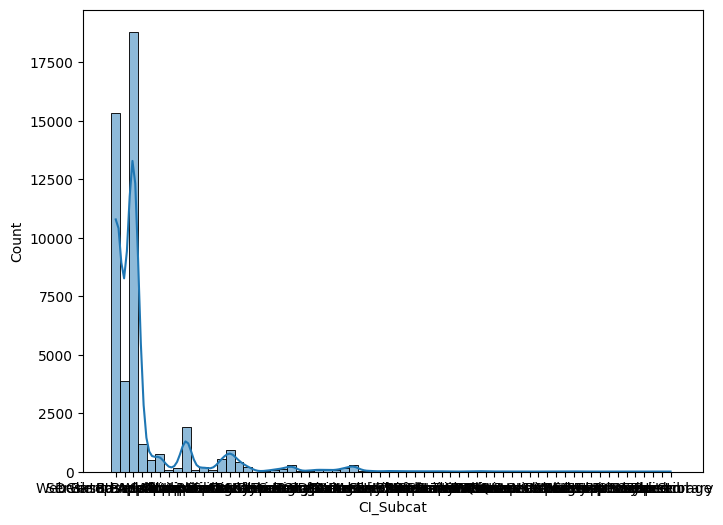

In [85]:


plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['CI_Subcat'], kde=True)

* The distribution of the CI_Subcat column is skewed to the right.
* There is a small number of outliers at the high end, representing CI_Subcat values of In Progress and Not Started.

In [86]:
data["CI_Subcat"].mode()

0    Server Based Application
Name: CI_Subcat, dtype: object

In [87]:
data.CI_Subcat.unique()
data.CI_Subcat.value_counts()

Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
VMWare                          1
Application Server              1
NonStop Storage                 1
Protocol                        1
Security Software               1
Name: CI_Subcat, Length: 64, dtype: int64

In [88]:
data.loc[data["CI_Subcat"].isnull()==True,"CI_Subcat"]="Server Based Application"

In [89]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

### **Replacing Null Values for Priority**





In [90]:
data[data["Priority"].isnull()]["Priority"]

2       NaN
8       NaN
103     NaN
147     NaN
152     NaN
         ..
46424   NaN
46446   NaN
46484   NaN
46553   NaN
46590   NaN
Name: Priority, Length: 1380, dtype: float64

<Axes: xlabel='Priority', ylabel='Count'>

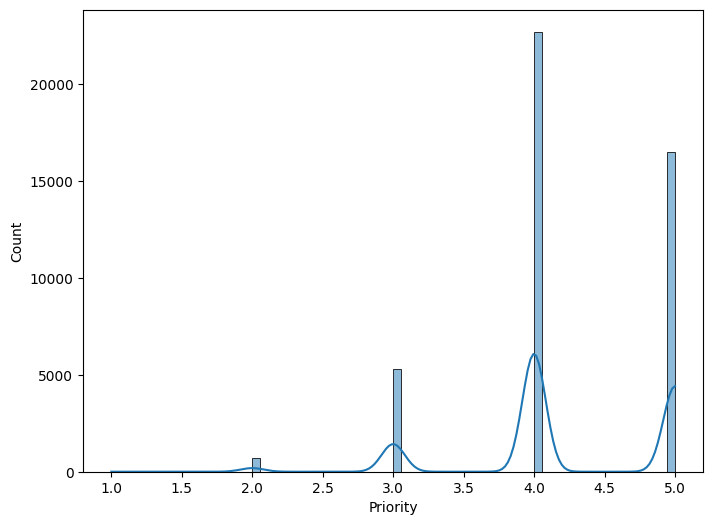

In [91]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['Priority'], kde=True)

* The distribution of the data is skewed to the right, with most values between 20 and 50.
* There are a few outliers at the high end, with values above 100.

In [92]:
data["Priority"].median()

4.0

In [93]:
data["Priority"].mode()

0    4.0
Name: Priority, dtype: float64

In [94]:
data.loc[data["Priority"].isnull()==True,"Priority"]=4.0

In [95]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

In [96]:
data.sample(10)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
34639,application,Desktop Application,Closed,4,4,4.0,0.120459,incident,0.0,6/2/2014 17:13,NaN,6/2/2014 17:47,6/2/2014 17:47,"0,565",Other,1.0,NaN,NaN
45199,application,Server Based Application,Closed,5,5,5.0,0.727356,incident,0.0,24-03-2014 13:47,NaN,25-03-2014 12:42,25-03-2014 12:42,"9,40,19,44,444",Data,1.0,NaN,NaN
44944,application,Desktop Application,Closed,4,4,4.0,0.361151,incident,0.0,24-03-2014 09:00,NaN,24-03-2014 09:48,24-03-2014 09:48,"0,801944444",Software,1.0,1.0,NaN
42149,application,Server Based Application,Closed,3,3,3.0,0.573160,incident,1.0,10/3/2014 16:24,NaN,10/3/2014 17:07,10/3/2014 17:07,"0,713611111",User error,1.0,NaN,NaN
1257,application,Server Based Application,Closed,4,4,4.0,0.658729,incident,0.0,1/10/2013 10:05,NaN,2/10/2013 8:00,2/10/2013 8:01,"8,44,11,11,111",Unknown,1.0,NaN,NaN
20407,subapplication,Web Based Application,Closed,4,4,4.0,0.168460,incident,0.0,10/12/2013 15:04,NaN,11/12/2013 7:57,11/12/2013 7:57,"3,37,80,55,556",Other,1.0,NaN,NaN
23179,computer,Laptop,Closed,5,5,5.0,0.396450,incident,0.0,23-12-2013 09:10,NaN,31-12-2013 09:14,31-12-2013 09:15,"2,28,775",Hardware,1.0,NaN,NaN
42522,storage,Controller,Closed,3,3,3.0,0.346834,incident,0.0,11/3/2014 17:11,NaN,12/3/2014 16:21,12/3/2014 16:22,"9,67,27,77,778",Hardware,1.0,NaN,NaN
37695,application,Desktop Application,Closed,NS,3,4.0,0.528557,incident,0.0,19-02-2014 08:18,NaN,19-02-2014 08:30,19-02-2014 08:30,"0,206111111",Software,1.0,NaN,1.0
24521,storage,SAN,Closed,4,4,4.0,0.560909,incident,0.0,31-12-2013 11:57,NaN,2/1/2014 9:22,2/1/2014 9:22,"7,91,33,33,333",Other,1.0,NaN,NaN


### **Remove the row with the null value for No_of_Reassignments**

In [97]:
# Remove the row with the null value in the 'No_of_Reassignments' column
data = data.dropna(subset=['No_of_Reassignments'])

In [98]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44321
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   0
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

### **Replacing Null Values for Closure_Code**

In [110]:
data[data["Closure_Code"].isnull()]["Closure_Code"]

9275     NaN
9488     NaN
9698     NaN
9989     NaN
10045    NaN
        ... 
46077    NaN
46247    NaN
46291    NaN
46357    NaN
46413    NaN
Name: Closure_Code, Length: 460, dtype: object

<Axes: xlabel='Closure_Code', ylabel='Count'>

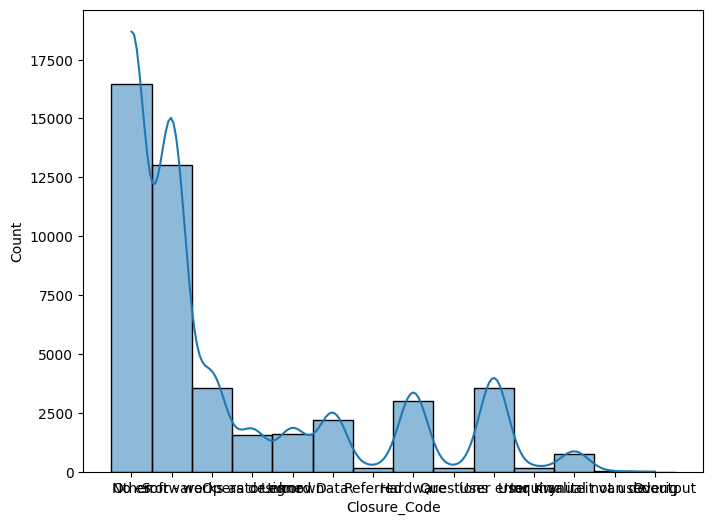

In [113]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['Closure_Code'], kde=True)

In [115]:
data["Closure_Code"].mode()

0    Other
Name: Closure_Code, dtype: object

In [116]:
data.Closure_Code.unique()
data.Closure_Code.value_counts()

Other                           16470
Software                        13026
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: Closure_Code, dtype: int64

In [117]:
data.loc[data["Closure_Code"].isnull()==True,"Closure_Code"]="other"

In [118]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44321
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions      114
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

## **Replacing Null Values for No_of_Related_Interactions**

In [119]:
data[data["No_of_Related_Interactions"].isnull()]["No_of_Related_Interactions"]

300     NaN
1085    NaN
2483    NaN
3035    NaN
3299    NaN
         ..
46468   NaN
46469   NaN
46470   NaN
46472   NaN
46473   NaN
Name: No_of_Related_Interactions, Length: 114, dtype: float64

<Axes: xlabel='No_of_Related_Interactions', ylabel='Count'>

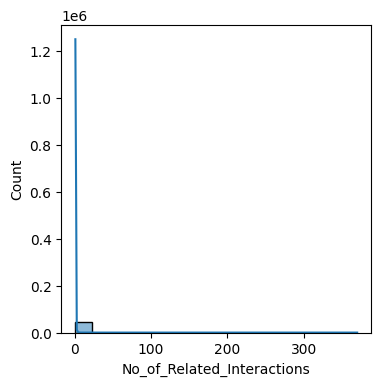

In [121]:
plt.figure(figsize=(4,4))
sns.histplot(data=data, x=data['No_of_Related_Interactions'], kde=True)

In [122]:
data["No_of_Related_Interactions"].median()

1.0

In [123]:
data["No_of_Related_Interactions"].mode()

0    1.0
Name: No_of_Related_Interactions, dtype: float64

In [124]:
data.loc[data["No_of_Related_Interactions"].isnull()==True,"No_of_Related_Interactions"]=1.0

In [125]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44321
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions        0
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

# **Check for Outliers**

In [99]:
num_data=data.select_dtypes(include=["int64","float64"]).columns

In [100]:
num_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [101]:
cat_data

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Category',
       'Alert_Status', 'Open_Time', 'Reopen_Time', 'Resolved_Time',
       'Close_Time', 'Handle_Time_hrs', 'Closure_Code'],
      dtype='object')

## **Box Plot for number_cnt**

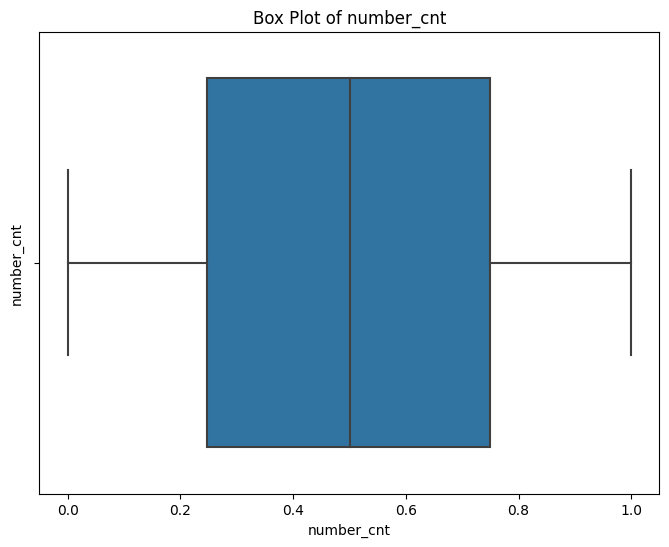

In [102]:
# Create a box plot for the 'number_cnt' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['number_cnt'])
plt.title('Box Plot of number_cnt')
plt.ylabel('number_cnt')
plt.show()


## **Box Plot for No_of_Reassignments**

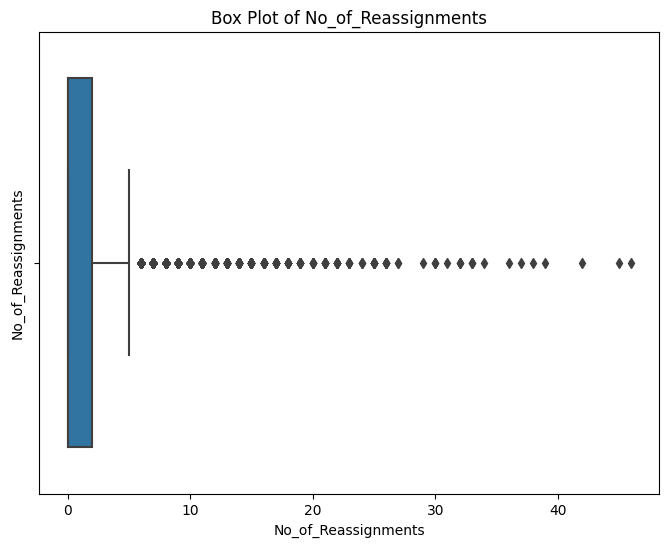

In [103]:
# Create a box plot for the 'number_cnt' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Reassignments'])
plt.title('Box Plot of No_of_Reassignments')
plt.ylabel('No_of_Reassignments')
plt.show()

## **Outliers Handle for No_of_Reassignments**

<Axes: xlabel='No_of_Reassignments', ylabel='Count'>

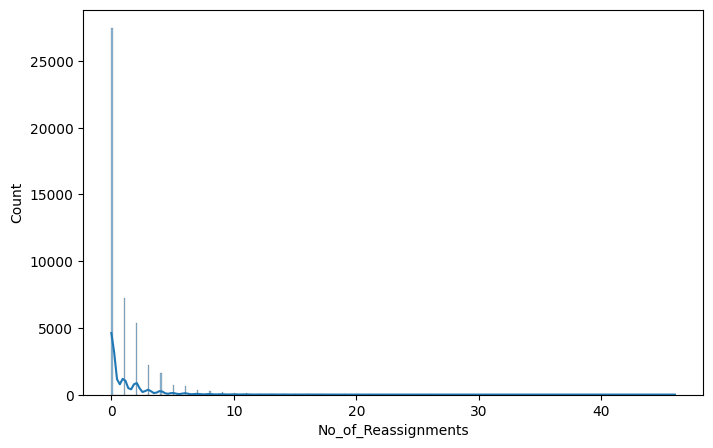

In [104]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Reassignments',kde=True)

### **Insights**
* Most tickets (0 reassignments) are resolved without being reassigned.
* Reassignments decrease exponentially.
* There is a small peak at 3 reassignments.
* The graph is skewed to the right, meaning more tickets have a few reassignments than many reassignments.

In [105]:
Q1=data["No_of_Reassignments"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Reassignments"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 0.0
upper_quartile 2.0


In [106]:
IQR=Q3-Q1
IQR

2.0

In [107]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is -3.0
upper_limit is 5.0


In [108]:
data.loc[data["No_of_Reassignments"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,Closed,4,4,4.0,0.601292,incident,26.0,5/2/2012 13:32,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,2.0,NaN
1,application,Web Based Application,Closed,3,3,3.0,0.415050,incident,33.0,12/3/2012 15:44,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,1.0,NaN
3,application,Web Based Application,Closed,4,4,4.0,0.642927,incident,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,NaN,NaN
10,application,Web Based Application,Closed,4,4,4.0,0.439909,incident,6.0,21-09-2012 12:56,NaN,8/11/2013 14:23,8/11/2013 14:23,"3,06,74,49,167",Software,1.0,NaN,1.0
11,application,Web Based Application,Closed,4,4,4.0,0.291928,incident,8.0,1/10/2012 10:49,NaN,8/11/2013 14:18,8/11/2013 14:22,"1,32,26,19,167",Software,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44961,application,Server Based Application,Closed,3,3,3.0,0.267787,incident,10.0,21-03-2014 15:57,31-03-2014 11:45,31-03-2014 17:28,31-03-2014 17:28,"5,81,92,22,222",Other,2.0,NaN,NaN
45040,application,Server Based Application,Closed,5,5,5.0,0.680022,incident,6.0,24-03-2014 09:57,NaN,25-03-2014 14:30,25-03-2014 14:30,"1,50,36,66,667",Software,1.0,NaN,NaN
45196,application,Server Based Application,Closed,4,4,4.0,0.449103,incident,7.0,24-03-2014 13:33,NaN,26-03-2014 08:43,26-03-2014 08:43,"1,61,62,77,778",Other,1.0,NaN,NaN
45273,application,Desktop Application,Closed,4,4,4.0,0.166302,incident,8.0,25-03-2014 08:40,NaN,31-03-2014 12:48,31-03-2014 12:48,"3,17,67,22,222",Software,1.0,NaN,NaN


In [109]:
len(data.loc[data["No_of_Reassignments"]>upper_limit])/len(data)

0.042334513464220576

In [ ]:
data.loc[data["No_of_Reassignments"]>upper_limit,"No_of_Reassignments"]=data["No_of_Reassignments"].median()

<Axes: xlabel='No_of_Reassignments'>

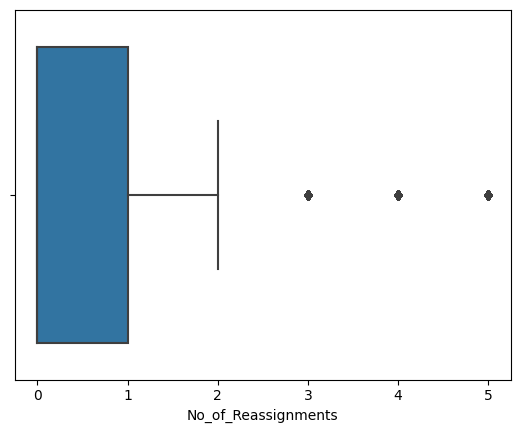

In [ ]:
sns.boxplot(x=data.No_of_Reassignments)

## **Box Plot for No_of_Related_Interactions**

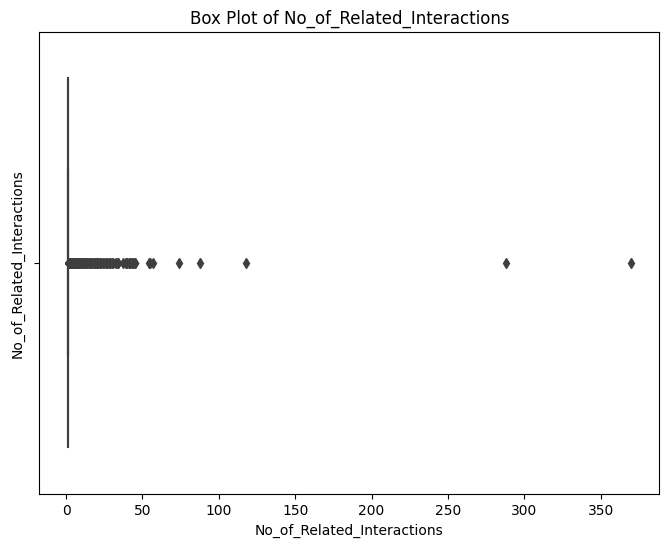

In [ ]:
# Create a box plot for the 'No_of_Related_Interactions' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Related_Interactions'])
plt.title('Box Plot of No_of_Related_Interactions')
plt.ylabel('No_of_Related_Interactions')
plt.show()

## **Outliers Handle for No_of_Related_Interactions**

<Axes: xlabel='No_of_Related_Interactions', ylabel='Count'>

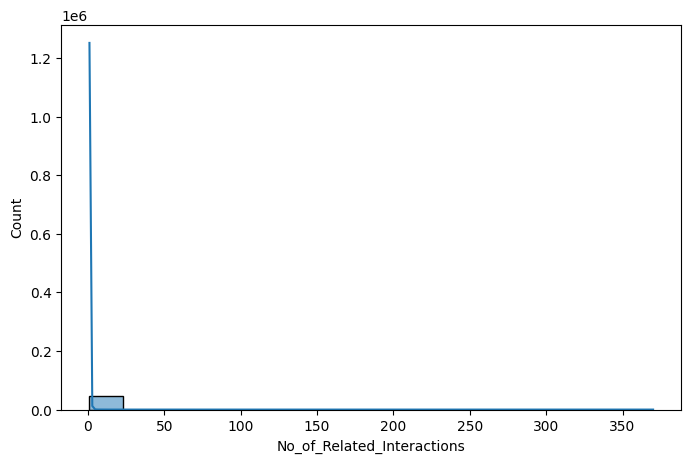

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Interactions',kde=True)

### **Insights**
* Most tickets (0 reassignments) are resolved without being reassigned.
* Reassignments decrease exponentially.
* There is a small peak at 3 reassignments.
* The graph is skewed to the right, meaning more tickets have a few reassignments than many reassignments.

In [ ]:
Q1 = data["No_of_Related_Interactions"].quantile(0.25)
print("lower_quantile",Q1)
Q3 = data["No_of_Related_Interactions"].quantile(0.75)
print("upper_quantile",Q3)

lower_quantile 1.0
upper_quantile 1.0


In [ ]:
IQR=Q3 - Q1
IQR

0.0

In [ ]:
lower_limit = Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit = Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [ ]:
data.loc[data["No_of_Related_Interactions"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
12,application,Web Based Application,Closed,4,4,4.0,0.776486,incident,5.0,2/10/2012 12:12,28-01-2014 14:07,4/2/2014 9:38,4/2/2014 9:38,"1,13,24,28,333",Software,2.0,NaN,NaN
18,application,Desktop Application,Closed,3,3,3.0,0.860255,incident,0.0,7/12/2012 14:34,NaN,30-11-2013 10:39,30-11-2013 10:39,"2,62,67,33,889",Other,2.0,NaN,NaN
19,application,Web Based Application,Closed,5,5,5.0,0.663615,incident,5.0,10/12/2012 14:44,11/2/2014 14:50,28-03-2014 14:20,28-03-2014 14:20,"9,31,78,08,333",Other,2.0,NaN,NaN
27,application,Server Based Application,Closed,5,5,5.0,0.748361,request for information,0.0,6/2/2013 14:07,17-10-2013 12:22,17-10-2013 14:00,17-10-2013 14:00,"3,88,55,55,556",No error - works as designed,2.0,NaN,NaN
29,application,Server Based Application,Closed,5,5,5.0,0.853722,request for information,2.0,18-02-2013 11:59,4/12/2013 13:58,NaN,4/12/2013 14:00,"2,77,45,55,556",Other,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46455,application,Server Based Application,Closed,4,4,4.0,0.175887,incident,1.0,31-03-2014 08:41,31-03-2014 10:55,31-03-2014 11:56,31-03-2014 11:56,"1,55,94,44,444",Other,2.0,NaN,NaN
46458,application,Server Based Application,Closed,5,5,5.0,0.969598,incident,0.0,31-03-2014 08:58,NaN,31-03-2014 09:30,31-03-2014 09:30,"0,084722222",Software,2.0,NaN,NaN
46460,application,Server Based Application,Closed,5,3,4.0,0.628989,incident,0.0,31-03-2014 09:05,NaN,31-03-2014 09:28,31-03-2014 09:29,"0,407777778",Software,2.0,NaN,NaN
46471,application,Server Based Application,Closed,5,5,5.0,0.280788,incident,0.0,31-03-2014 08:17,NaN,31-03-2014 09:19,31-03-2014 09:19,"1,03",Software,2.0,NaN,NaN


In [ ]:
data.loc[data["No_of_Related_Interactions"]<lower_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes


In [ ]:
len(data.loc[data["No_of_Related_Interactions"]>upper_limit])/len(data)

0.07368150023602112

In [ ]:
data.loc[data["No_of_Related_Interactions"]>upper_limit,"No_of_Related_Interactions"]=data["No_of_Related_Interactions"].median()

<Axes: xlabel='No_of_Related_Interactions'>

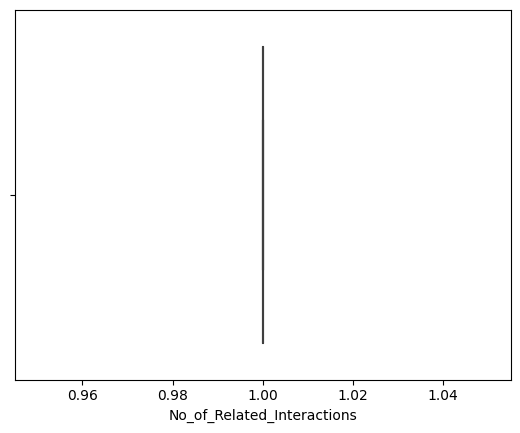

In [ ]:
sns.boxplot(x=data.No_of_Related_Interactions)

* Median number of related interactions is 1.
* 75% of tickets have 3 or fewer related interactions.
* There are a few outliers with many related interactions (up to 20).


## **Box Plot for No_of_Related_Incidents**

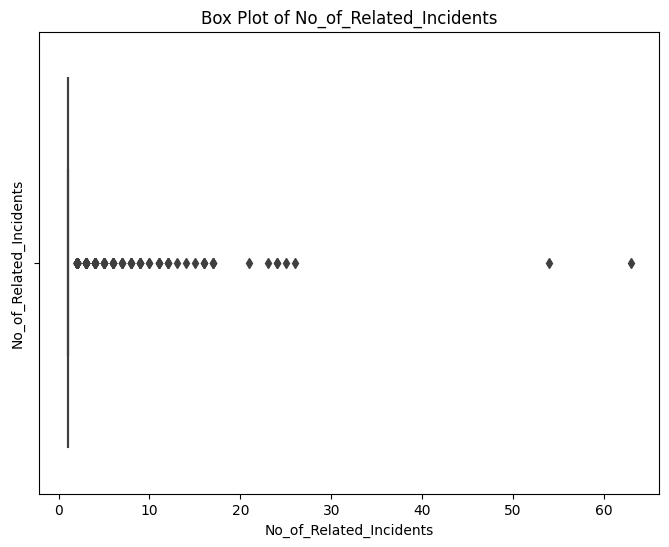

In [ ]:
# Create a box plot for the 'No_of_Related_Incidents' column
plt.figure(figsize=(8,6))
sns.boxplot(x=data['No_of_Related_Incidents'])
plt.title('Box Plot of No_of_Related_Incidents')
plt.ylabel('No_of_Related_Incidents')
plt.show()

## **Outliers Handle for No_of_Related_Incidents**

<Axes: xlabel='No_of_Related_Incidents', ylabel='Count'>

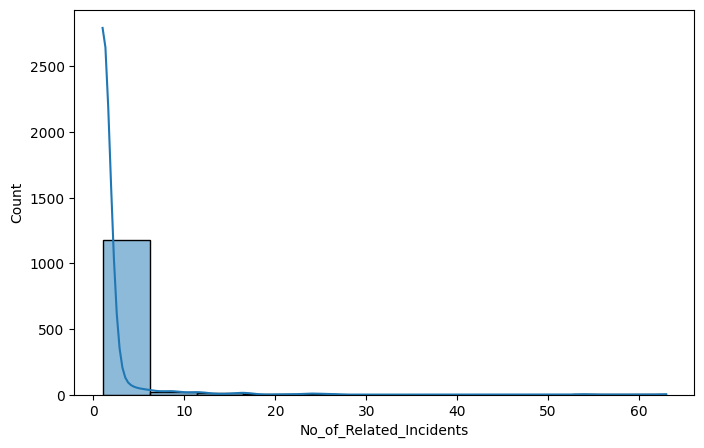

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Incidents',kde=True)

## Insights
* The most common number of related incidents is 1.
* The distribution of the number of related incidents is skewed to the right, meaning that there are more incidents with fewer related incidents than incidents with more related incidents.
*The maximum number of related incidents is 53.

In [ ]:
Q1=data["No_of_Related_Incidents"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Related_Incidents"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 1.0
upper_quartile 1.0


In [ ]:
IQR=Q3-Q1
IQR

0.0

In [ ]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [ ]:
data.loc[data["No_of_Related_Incidents"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,Closed,4,4,4.0,0.601292,incident,0.0,5/2/2012 13:32,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,2.0,NaN
13,application,Web Based Application,Closed,4,4,4.0,0.592713,incident,0.0,15-10-2012 15:50,NaN,NaN,14-11-2013 13:33,"6,67,54,16,667",Software,1.0,2.0,NaN
15,application,Web Based Application,Closed,4,4,4.0,0.701705,incident,3.0,23-10-2012 12:01,NaN,8/11/2013 14:57,8/11/2013 14:58,"2,83,79,50,556",Other,1.0,2.0,NaN
20,application,Web Based Application,Closed,4,4,4.0,0.428148,incident,0.0,24-12-2012 16:31,NaN,14-11-2013 09:49,14-11-2013 09:49,"1,93,04,83,333",Referred,1.0,2.0,NaN
119,application,Standard Application,Closed,5,5,5.0,0.875886,incident,2.0,26-06-2013 12:09,NaN,18-11-2013 09:14,18-11-2013 09:15,"5,23,78,69,444",Software,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45336,application,Server Based Application,Closed,3,3,3.0,0.496306,incident,0.0,25-03-2014 03:30,NaN,25-03-2014 15:45,25-03-2014 15:46,"2,84,83,33,333",Hardware,1.0,2.0,NaN
45411,application,Desktop Application,Closed,2,3,2.0,0.427608,incident,1.0,25-03-2014 11:56,NaN,26-03-2014 08:10,26-03-2014 08:11,"7,16,91,66,667",Software,1.0,15.0,1.0
45962,subapplication,Web Based Application,Closed,2,2,2.0,0.922142,incident,0.0,27-03-2014 08:22,NaN,27-03-2014 09:31,27-03-2014 09:33,"1,19,55,55,556",Other,1.0,8.0,NaN
46263,subapplication,Web Based Application,Closed,5,5,5.0,0.572573,incident,2.0,28-03-2014 10:19,NaN,29-03-2014 08:24,29-03-2014 08:24,"7,66,86,11,111",Other,1.0,2.0,NaN


In [ ]:
len(data.loc[data["No_of_Related_Incidents"]>upper_limit])/len(data)

0.003540316697420933

In [ ]:
data.loc[data["No_of_Related_Incidents"]>upper_limit,"No_of_Related_Incidents"]=data["No_of_Related_Incidents"].median()

<Axes: xlabel='No_of_Related_Incidents'>

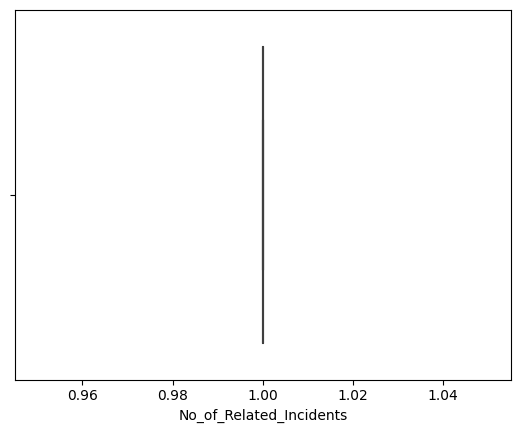

In [ ]:
sns.boxplot(x=data.No_of_Related_Incidents)

## **Box Plot for No_of_Related_Changes**

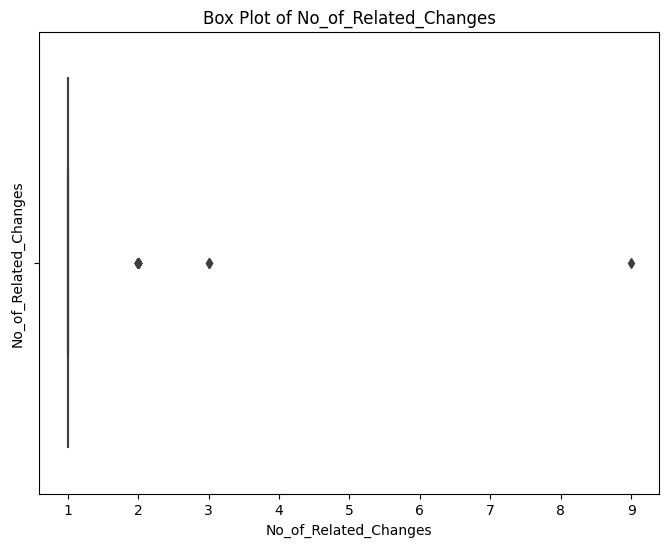

In [ ]:
# Create a box plot for the 'No_of_Related_Changes' column
plt.figure(figsize=(8,6))
sns.boxplot(x=data['No_of_Related_Changes'])
plt.title('Box Plot of No_of_Related_Changes')
plt.ylabel('No_of_Related_Changes')
plt.show()

## Outliers Handle for No_of_Related_changes

<Axes: xlabel='No_of_Related_Changes', ylabel='Count'>

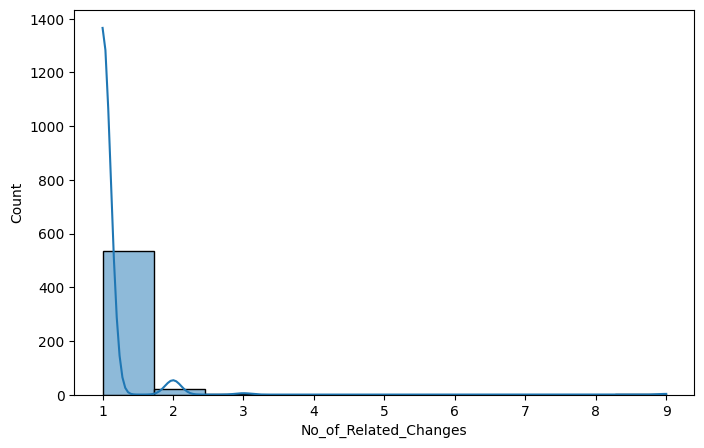

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Changes',kde=True)

### **Insights**
* The most common number of related changes is 1.
* The distribution of the number of related changes is skewed to the right, meaning that there are more changes with fewer related changes than changes with more related changes.
* The maximum number of related changes is 53.
* The median number of related changes is 2.
* The 75th percentile of the number of related changes is 4.
* The 95th percentile of the number of related changes is 10.

In [ ]:
Q1=data["No_of_Related_Changes"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Related_Changes"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 1.0
upper_quartile 1.0


In [ ]:
IQR=Q3-Q1
IQR

0.0

In [ ]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [ ]:
data.loc[data["No_of_Related_Changes"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
38,application,Web Based Application,Closed,3,3,3.0,0.481873,incident,4.0,5/3/2013 13:58,NaN,8/11/2013 15:35,8/11/2013 15:35,"2,16,22,22,222",Software,1.0,NaN,2.0
134,application,Standard Application,Closed,4,4,4.0,0.877301,incident,2.0,5/7/2013 13:35,NaN,18-11-2013 09:22,18-11-2013 09:24,"0,2175",Operator error,1.0,1.0,2.0
360,application,Web Based Application,Closed,4,4,4.0,0.261065,incident,0.0,10/9/2013 13:09,NaN,5/12/2013 10:16,5/12/2013 10:17,"6,48,13,36,111",Unknown,1.0,NaN,3.0
403,subapplication,Web Based Application,Closed,NS,3,4.0,0.709596,incident,0.0,12/9/2013 11:14,NaN,25-03-2014 12:52,25-03-2014 12:52,"7,72,98,61,111",Other,1.0,1.0,2.0
578,application,Desktop Application,Closed,4,4,4.0,0.354227,incident,2.0,23-09-2013 14:54,NaN,11/10/2013 12:41,11/10/2013 13:24,"1,05,77,97,222",Other,1.0,NaN,2.0
699,application,Web Based Application,Closed,5,5,5.0,0.574457,request for information,0.0,25-09-2013 11:36,NaN,22-10-2013 08:56,22-10-2013 08:56,"1,44,97,22,222",Other,1.0,NaN,2.0
3031,application,Server Based Application,Closed,5,5,5.0,0.673485,incident,0.0,7/10/2013 10:57,11/10/2013 10:32,14-10-2013 09:21,14-10-2013 09:21,"1,34,83,05,556",Software,1.0,NaN,2.0
4912,application,Web Based Application,Closed,5,5,5.0,0.631183,incident,0.0,14-10-2013 11:57,NaN,4/11/2013 8:44,4/11/2013 8:44,"2,48,34,72,222",Software,1.0,NaN,2.0
8907,application,Web Based Application,Closed,4,4,4.0,0.456999,incident,0.0,29-10-2013 14:24,NaN,5/11/2013 13:25,5/11/2013 13:26,"5,15,29,44,444",Software,1.0,NaN,2.0
19350,application,Server Based Application,Closed,4,4,4.0,0.205976,incident,2.0,6/12/2013 10:41,NaN,6/12/2013 14:05,6/12/2013 14:05,"3,41,30,55,556",Other,1.0,NaN,2.0


In [ ]:
len(data.loc[data["No_of_Related_Changes"]>upper_limit])/len(data)

0.0005149551559884993

In [ ]:
data.loc[data["No_of_Related_Changes"]>upper_limit,"No_of_Related_Changes"]=data["No_of_Related_Changes"].median()

<Axes: xlabel='No_of_Related_Changes'>

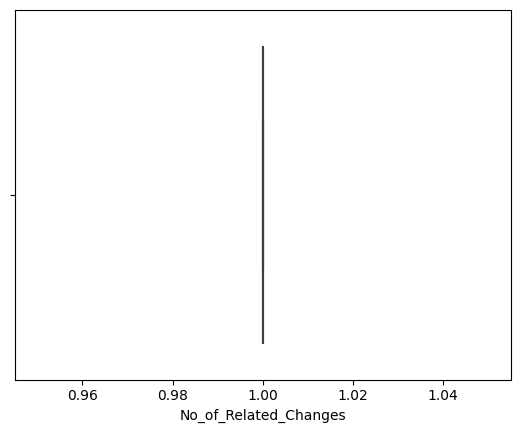

In [ ]:
sns.boxplot(x=data.No_of_Related_Changes)